In [1]:
# Cell 1: Upload Data & Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

warnings.filterwarnings('ignore')

print("Step 1: Libraries Imported.")
print("👇 Please upload your 'HR_Analytics.csv' file below:")

# Upload file functionality for Colab
uploaded = files.upload()
filename = next(iter(uploaded)) # Automatically gets the uploaded filename
print(f"✅ File '{filename}' uploaded successfully!")

Step 1: Libraries Imported.
👇 Please upload your 'HR_Analytics.csv' file below:


Saving HR_Analytics.csv to HR_Analytics.csv
✅ File 'HR_Analytics.csv' uploaded successfully!


In [2]:
# Cell 2: Data Cleaning & Preprocessing
df = pd.read_csv(filename)

# 1. Drop useless columns
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df_clean = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# 2. Encode Text to Numbers (Label Encoding)
label_encoders = {}
cat_cols = df_clean.select_dtypes(include=['object']).columns

for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le

print("✅ Data Cleaned & Encoded!")
print(f"Rows: {df_clean.shape[0]}, Columns: {df_clean.shape[1]}")
df_clean.head()

✅ Data Cleaned & Encoded!
Rows: 1480, Columns: 34


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,767,18,0,1,3,230,1,3,3,1,...,3,3,0,0,2,3,0,0,0,0.0
1,772,18,0,0,3,812,2,10,3,3,...,3,1,0,0,2,3,0,0,0,0.0
2,928,18,0,1,2,1306,2,5,3,2,...,3,4,0,0,3,3,0,0,0,0.0
3,1198,18,0,0,0,287,1,5,2,1,...,3,4,0,0,2,3,0,0,0,0.0
4,1299,18,0,1,0,247,1,8,1,3,...,3,4,0,0,0,3,0,0,0,0.0


In [3]:
# Cell 3: Train Random Forest Model
target_col = 'Attrition' # Make sure this matches your CSV column name

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
print("⚙️ Training Model... Please wait.")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model Trained Successfully!")

⚙️ Training Model... Please wait.
✅ Model Trained Successfully!


📊 Model Accuracy: 86.49%


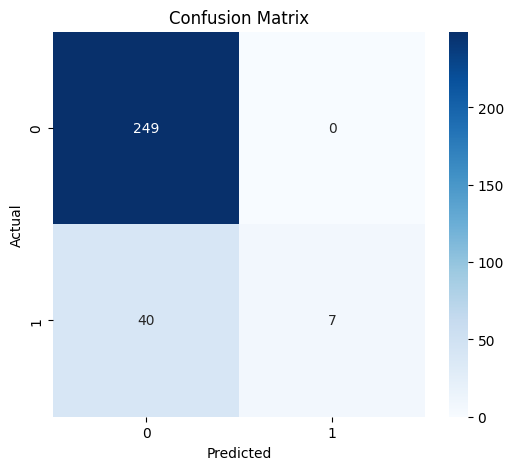

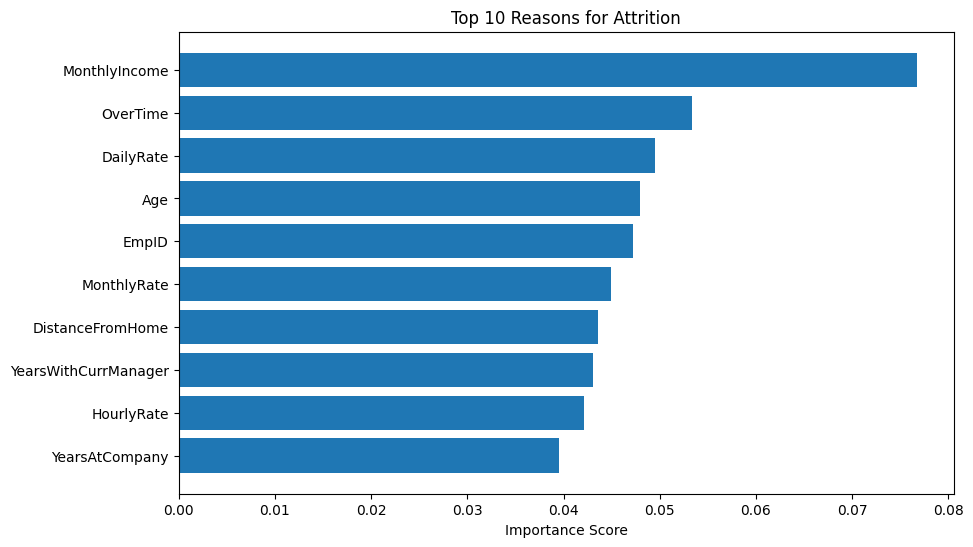

In [4]:
# Cell 4: Visualization & Reports

# Generate Predictions
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"📊 Model Accuracy: {acc*100:.2f}%")

# 1. Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('Confusion_Matrix.png') # Saves image
plt.show()

# 2. Feature Importance (Why people leave?)
importances = model.feature_importances_
indices = np.argsort(importances)[-10:] # Top 10 features
plt.figure(figsize=(10,6))
plt.title('Top 10 Reasons for Attrition')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importance Score')
plt.savefig('Feature_Importance.png') # Saves image
plt.show()

In [5]:
# Cell 5: Create Final CSV & Download Everything

# 1. Add Predictions to Original Data for Power BI
full_predictions = model.predict(X)
full_probs = model.predict_proba(X)[:, 1]

df['Attrition_Prediction'] = ['Yes' if x == 1 else 'No' for x in full_predictions]
df['Attrition_Risk_Score'] = (full_probs * 100).round(2)

# 2. Save CSV
output_csv = 'HR_Analytics_PowerBI_Ready.csv'
df.to_csv(output_csv, index=False)
print(f"✅ Final CSV '{output_csv}' created.")

# 3. Download Files to your Local Computer
from google.colab import files
files.download(output_csv)          # Download CSV
files.download('Confusion_Matrix.png') # Download Graph 1
files.download('Feature_Importance.png') # Download Graph 2

print("🎉 All files downloaded! Now use the CSV in Power BI.")

✅ Final CSV 'HR_Analytics_PowerBI_Ready.csv' created.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 All files downloaded! Now use the CSV in Power BI.
